In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("customer_churn.csv")

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2770,6100-QQHEB,Male,0,Yes,Yes,17,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.55,1515.1,Yes
5404,8910-ICHIU,Female,0,No,No,46,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),95.65,4664.2,No
5161,0696-UKTOX,Male,0,No,Yes,23,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,54.15,1312.45,No
3807,8625-AZYZY,Male,0,Yes,No,24,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.65,2542.45,Yes
3813,6837-HAEVO,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,105.00,7297.75,No


In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
517400/df.shape[0]

73.46301292063042

In [7]:
df.drop('customerID',axis='columns',inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [13]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


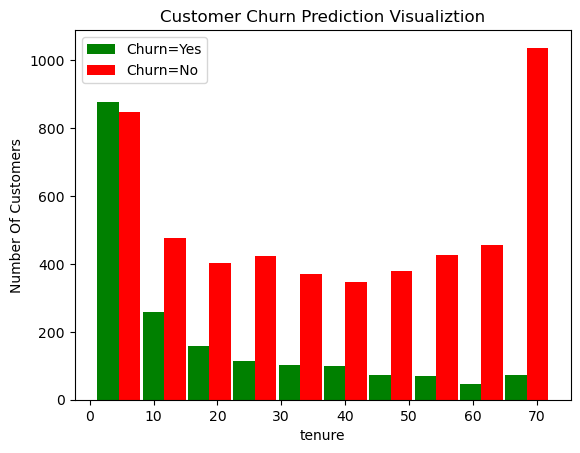

In [14]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

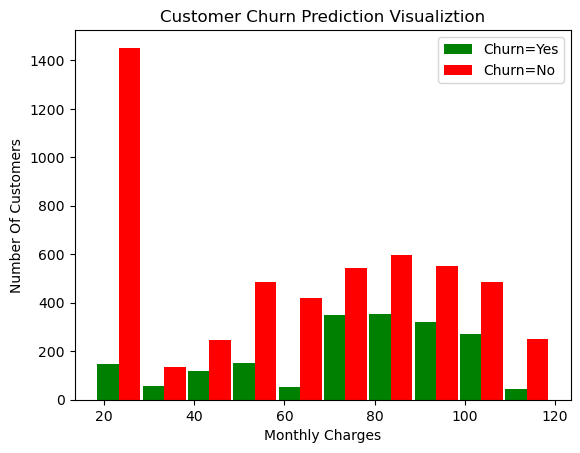

In [15]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [17]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [18]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [19]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [21]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
df1.gender.unique()

array([1, 0])

In [24]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2736,1,1,1,0,60,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
900,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
352,1,1,0,0,7,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2085,1,1,1,0,32,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3942,0,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [26]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [27]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [28]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [29]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [30]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [31]:
5163/1869

2.7624398073836276

# Building the model

In [32]:
# pip install tensorflow-addons

In [33]:
import tensorflow_addons
from tensorflow_addons import losses

2024-07-10 17:41:50.070287: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [35]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [36]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 966us/step - loss: 0.4862 - accuracy: 0.7643
Epoch 2/100
176/176 [==============================] - 0s 892us/step - loss: 0.4257 - accuracy: 0.7920
Epoch 3/100
176/176 [==============================] - 0s 881us/step - loss: 0.4228 - accuracy: 0.7913
Epoch 4/100
176/176 [==============================] - 0s 900us/step - loss: 0.4171 - accuracy: 0.7984
Epoch 5/100
176/176 [==============================] - 0s 853us/step - loss: 0.4154 - accuracy: 0.7982
Epoch 6/100
176/176 [==============================] - 0s 875us/step - loss: 0.4132 - accuracy: 0.8018
Epoch 7/100
176/176 [==============================] - 0s 882us/step - loss: 0.4126 - accuracy: 0.8037
Epoch 8/100
176/176 [==============================] - 0s 856us/step - loss: 0.4104 - accuracy: 0.8005
Epoch 9/100
176/176 [==============================] - 0s 886us/step - loss: 0.4088 - accuracy: 0.8027
Epoch 10/100
176/176 [==============================] - 0s 921us/step - l

176/176 [==============================] - 0s 862us/step - loss: 0.3605 - accuracy: 0.8281
Epoch 80/100
176/176 [==============================] - 0s 852us/step - loss: 0.3611 - accuracy: 0.8304
Epoch 81/100
176/176 [==============================] - 0s 867us/step - loss: 0.3602 - accuracy: 0.8297
Epoch 82/100
176/176 [==============================] - 0s 848us/step - loss: 0.3595 - accuracy: 0.8284
Epoch 83/100
176/176 [==============================] - 0s 841us/step - loss: 0.3580 - accuracy: 0.8309
Epoch 84/100
176/176 [==============================] - 0s 858us/step - loss: 0.3581 - accuracy: 0.8302
Epoch 85/100
176/176 [==============================] - 0s 851us/step - loss: 0.3584 - accuracy: 0.8322
Epoch 86/100
176/176 [==============================] - 0s 847us/step - loss: 0.3578 - accuracy: 0.8313
Epoch 87/100
176/176 [==============================] - 0s 842us/step - loss: 0.3581 - accuracy: 0.8292
Epoch 88/100
176/176 [==============================] - 0s 856us/step - loss:

# Overcoming imbalance(skewedness) in data

## Method 1: Undersampling

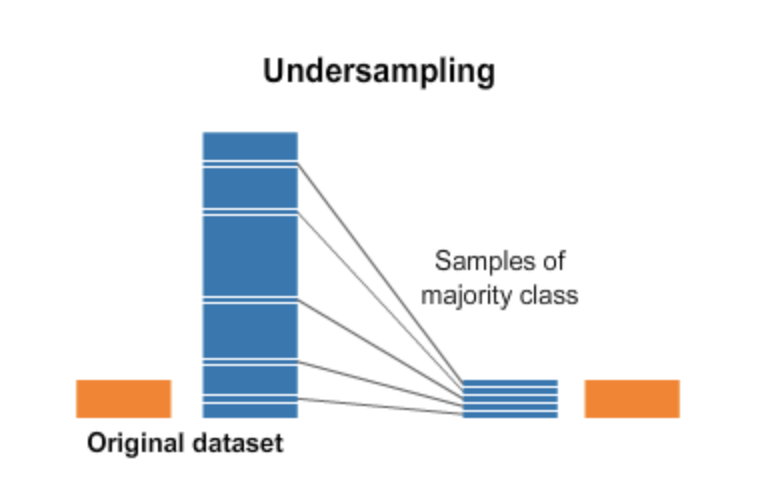

In [37]:
count_class_0, count_class_1 = df1.Churn.value_counts()

In [38]:
# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [39]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [40]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [41]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [42]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6370 - accuracy: 0.6365
Epoch 2/100
94/94 [==============================] - 0s 937us/step - loss: 0.5333 - accuracy: 0.7415
Epoch 3/100
94/94 [==============================] - 0s 866us/step - loss: 0.5162 - accuracy: 0.7475
Epoch 4/100
94/94 [==============================] - 0s 904us/step - loss: 0.5065 - accuracy: 0.7552
Epoch 5/100
94/94 [==============================] - 0s 904us/step - loss: 0.5022 - accuracy: 0.7572
Epoch 6/100
94/94 [==============================] - 0s 909us/step - loss: 0.4995 - accuracy: 0.7525
Epoch 7/100
94/94 [==============================] - 0s 932us/step - loss: 0.4954 - accuracy: 0.7592
Epoch 8/100
94/94 [==============================] - 0s 900us/step - loss: 0.4940 - accuracy: 0.7625
Epoch 9/100
94/94 [==============================] - 0s 825us/step - loss: 0.4919 - accuracy: 0.7609
Epoch 10/100
94/94 [==============================] - 0s 930us/step - loss: 0.4901 - accuracy

94/94 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8010
Epoch 82/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8003
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8037
Epoch 84/100
94/94 [==============================] - 0s 906us/step - loss: 0.4133 - accuracy: 0.8050
Epoch 85/100
94/94 [==============================] - 0s 824us/step - loss: 0.4127 - accuracy: 0.8027
Epoch 86/100
94/94 [==============================] - 0s 877us/step - loss: 0.4126 - accuracy: 0.7993
Epoch 87/100
94/94 [==============================] - 0s 959us/step - loss: 0.4100 - accuracy: 0.8040
Epoch 88/100
94/94 [==============================] - 0s 968us/step - loss: 0.4096 - accuracy: 0.8033
Epoch 89/100
94/94 [==============================] - 0s 848us/step - loss: 0.4088 - accuracy: 0.8080
Epoch 90/100
94/94 [==============================] - 0s 935us/step - loss: 0.4086 - accuracy: 0.8050

## Method 2: Oversampling

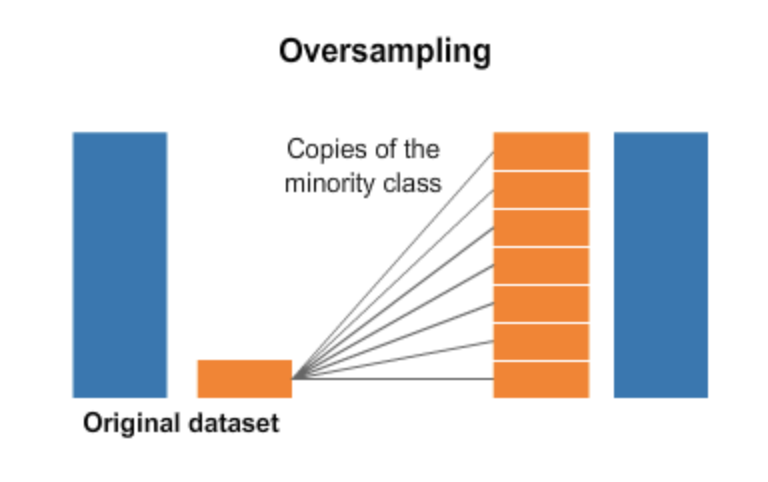

In [43]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [44]:
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [45]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [46]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [47]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 993us/step - loss: 0.5509 - accuracy: 0.7270
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.7611
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.7614
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7644
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.7654
Epoch 6/100
259/259 [==============================] - 0s 868us/step - loss: 0.4766 - accuracy: 0.7678
Epoch 7/100
259/259 [==============================] - 0s 889us/step - loss: 0.4738 - accuracy: 0.7699
Epoch 8/100
259/259 [==============================] - 0s 892us/step - loss: 0.4724 - accuracy: 0.7677
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.7722
Epoch 10/100
259/259 [==============================] - 0s 864us/step - loss: 0.467

259/259 [==============================] - 0s 870us/step - loss: 0.3861 - accuracy: 0.8231
Epoch 81/100
259/259 [==============================] - 0s 869us/step - loss: 0.3867 - accuracy: 0.8232
Epoch 82/100
259/259 [==============================] - 0s 882us/step - loss: 0.3862 - accuracy: 0.8209
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8222
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8274
Epoch 85/100
259/259 [==============================] - 0s 885us/step - loss: 0.3839 - accuracy: 0.8247
Epoch 86/100
259/259 [==============================] - 0s 888us/step - loss: 0.3849 - accuracy: 0.8234
Epoch 87/100
259/259 [==============================] - 0s 877us/step - loss: 0.3827 - accuracy: 0.8257
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8280
Epoch 89/100
259/259 [==============================] - 0s 846us/step - loss: 0.381

## Method 3: SMOTE

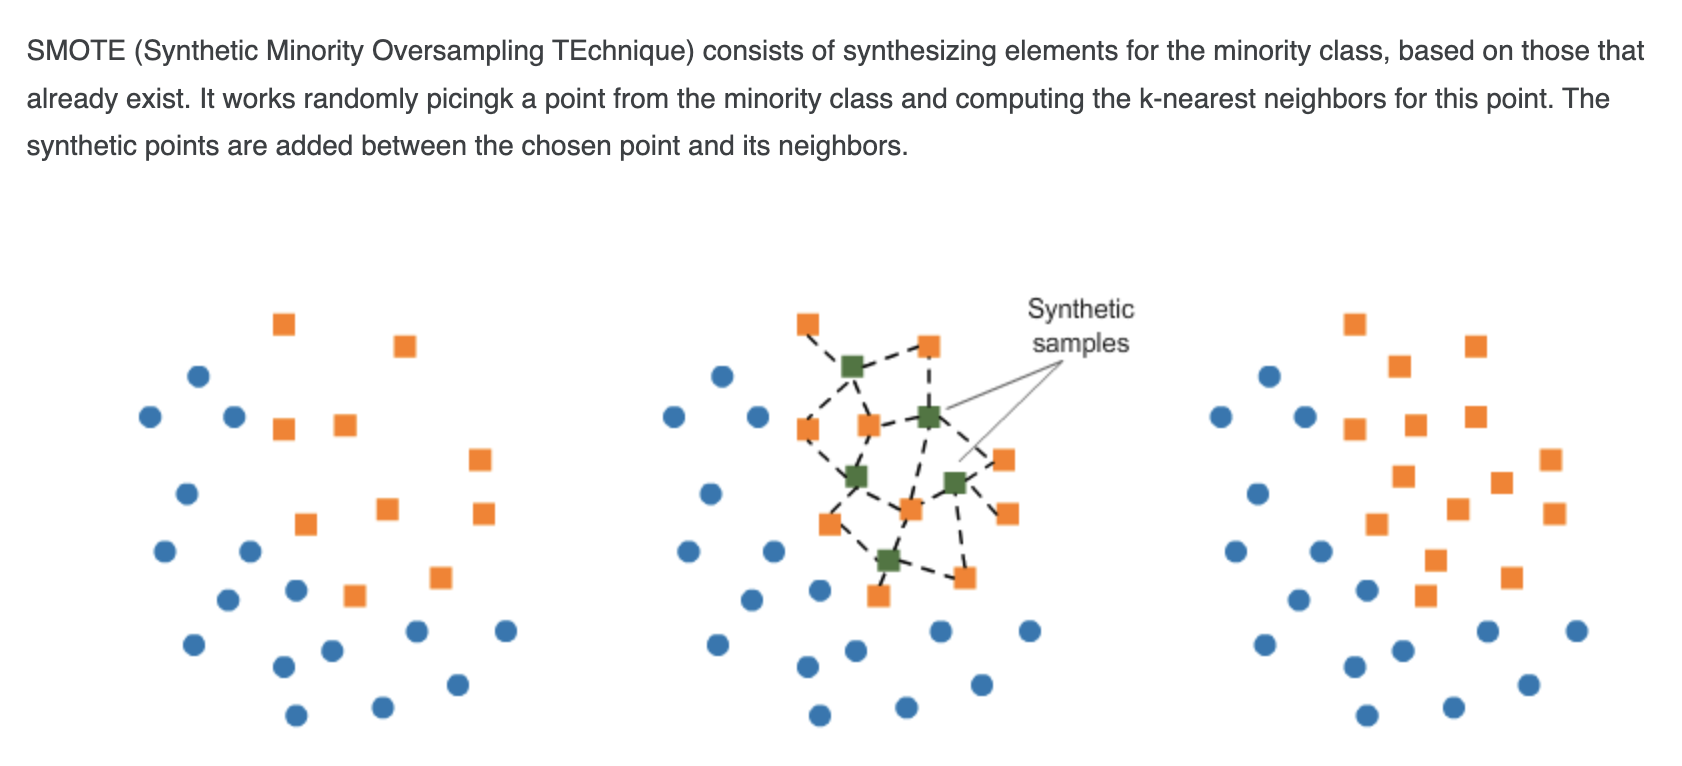

In [48]:
# pip uninstall imblearn --yes

In [49]:
# pip install imbalanced-learn

In [50]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
# conda install -c conda-forge imbalanced-learn

In [ ]:
# pip uninstall scikit-learn --yes

In [ ]:
# pip install scikit-learn==1.2.2

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [54]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 862us/step - loss: 0.5167 - accuracy: 0.7570
Epoch 2/100
259/259 [==============================] - 0s 798us/step - loss: 0.4752 - accuracy: 0.7749
Epoch 3/100
259/259 [==============================] - 0s 863us/step - loss: 0.4671 - accuracy: 0.7795
Epoch 4/100
259/259 [==============================] - 0s 874us/step - loss: 0.4605 - accuracy: 0.7824
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.7838
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.7887
Epoch 7/100
259/259 [==============================] - 0s 891us/step - loss: 0.4464 - accuracy: 0.7892
Epoch 8/100
259/259 [==============================] - 0s 883us/step - loss: 0.4411 - accuracy: 0.7943
Epoch 9/100
259/259 [==============================] - 0s 905us/step - loss: 0.4382 - accuracy: 0.7966
Epoch 10/100
259/259 [==============================] - 0s 829us/step - loss:

Epoch 80/100
259/259 [==============================] - 0s 872us/step - loss: 0.3429 - accuracy: 0.8510
Epoch 81/100
259/259 [==============================] - 0s 810us/step - loss: 0.3393 - accuracy: 0.8523
Epoch 82/100
259/259 [==============================] - 0s 863us/step - loss: 0.3399 - accuracy: 0.8534
Epoch 83/100
259/259 [==============================] - 0s 834us/step - loss: 0.3380 - accuracy: 0.8498
Epoch 84/100
259/259 [==============================] - 0s 824us/step - loss: 0.3373 - accuracy: 0.8521
Epoch 85/100
259/259 [==============================] - 0s 857us/step - loss: 0.3376 - accuracy: 0.8483
Epoch 86/100
259/259 [==============================] - 0s 852us/step - loss: 0.3386 - accuracy: 0.8536
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8556
Epoch 88/100
259/259 [==============================] - 0s 825us/step - loss: 0.3377 - accuracy: 0.8544
Epoch 89/100
259/259 [==============================] - 0s 843us/s

## Method 4: Using Ensemble Method

In [56]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [57]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [59]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [61]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [62]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [63]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [64]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train   

In [65]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6129 - accuracy: 0.6940
Epoch 2/100
94/94 [==============================] - 0s 842us/step - loss: 0.5193 - accuracy: 0.7505
Epoch 3/100
94/94 [==============================] - 0s 819us/step - loss: 0.5039 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 0s 813us/step - loss: 0.4972 - accuracy: 0.7622
Epoch 5/100
94/94 [==============================] - 0s 829us/step - loss: 0.4909 - accuracy: 0.7592
Epoch 6/100
94/94 [==============================] - 0s 843us/step - loss: 0.4870 - accuracy: 0.7652
Epoch 7/100
94/94 [==============================] - 0s 828us/step - loss: 0.4865 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 879us/step - loss: 0.4840 - accuracy: 0.7649
Epoch 9/100
94/94 [==============================] - 0s 840us/step - loss: 0.4806 - accuracy: 0.7639
Epoch 10/100
94/94 [==============================] - 0s 836us/step - loss: 0.4801 - accuracy

94/94 [==============================] - 0s 791us/step - loss: 0.3933 - accuracy: 0.8181
Epoch 82/100
94/94 [==============================] - 0s 828us/step - loss: 0.3944 - accuracy: 0.8171
Epoch 83/100
94/94 [==============================] - 0s 824us/step - loss: 0.3931 - accuracy: 0.8187
Epoch 84/100
94/94 [==============================] - 0s 850us/step - loss: 0.3912 - accuracy: 0.8227
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8207
Epoch 86/100
94/94 [==============================] - 0s 924us/step - loss: 0.3889 - accuracy: 0.8181
Epoch 87/100
94/94 [==============================] - 0s 814us/step - loss: 0.3886 - accuracy: 0.8227
Epoch 88/100
94/94 [==============================] - 0s 833us/step - loss: 0.3875 - accuracy: 0.8247
Epoch 89/100
94/94 [==============================] - 0s 810us/step - loss: 0.3867 - accuracy: 0.8258
Epoch 90/100
94/94 [==============================] - 0s 821us/step - loss: 0.3857 - accuracy: 0.

In [66]:
 X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.5882 - accuracy: 0.7147
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.7562
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7582
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7632
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7676
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7722
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4707 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 844us/step - loss: 0.4673 - accuracy: 0.7746
Epoch 1

94/94 [==============================] - 0s 839us/step - loss: 0.3753 - accuracy: 0.8207
Epoch 82/100
94/94 [==============================] - 0s 834us/step - loss: 0.3741 - accuracy: 0.8224
Epoch 83/100
94/94 [==============================] - 0s 877us/step - loss: 0.3745 - accuracy: 0.8268
Epoch 84/100
94/94 [==============================] - 0s 892us/step - loss: 0.3736 - accuracy: 0.8288
Epoch 85/100
94/94 [==============================] - 0s 840us/step - loss: 0.3742 - accuracy: 0.8258
Epoch 86/100
94/94 [==============================] - 0s 832us/step - loss: 0.3753 - accuracy: 0.8227
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8244
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8247
Epoch 89/100
94/94 [==============================] - 0s 905us/step - loss: 0.3693 - accuracy: 0.8278
Epoch 90/100
94/94 [==============================] - 0s 805us/step - loss: 0.3681 - accuracy: 0.82

In [67]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 1ms/step - loss: 0.6345 - accuracy: 0.6789
Epoch 2/100
83/83 [==============================] - 0s 833us/step - loss: 0.5161 - accuracy: 0.7605
Epoch 3/100
83/83 [==============================] - 0s 847us/step - loss: 0.4902 - accuracy: 0.7639
Epoch 4/100
83/83 [==============================] - 0s 861us/step - loss: 0.4840 - accuracy: 0.7696
Epoch 5/100
83/83 [==============================] - 0s 901us/step - loss: 0.4779 - accuracy: 0.7791
Epoch 6/100
83/83 [==============================] - 0s 910us/step - loss: 0.4754 - accuracy: 0.7769
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7772
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7829
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7848
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.7791

83/83 [==============================] - 0s 842us/step - loss: 0.3799 - accuracy: 0.8311
Epoch 82/100
83/83 [==============================] - 0s 872us/step - loss: 0.3808 - accuracy: 0.8262
Epoch 83/100
83/83 [==============================] - 0s 910us/step - loss: 0.3799 - accuracy: 0.8315
Epoch 84/100
83/83 [==============================] - 0s 904us/step - loss: 0.3805 - accuracy: 0.8296
Epoch 85/100
83/83 [==============================] - 0s 895us/step - loss: 0.3786 - accuracy: 0.8281
Epoch 86/100
83/83 [==============================] - 0s 852us/step - loss: 0.3769 - accuracy: 0.8323
Epoch 87/100
83/83 [==============================] - 0s 854us/step - loss: 0.3786 - accuracy: 0.8254
Epoch 88/100
83/83 [==============================] - 0s 867us/step - loss: 0.3753 - accuracy: 0.8292
Epoch 89/100
83/83 [==============================] - 0s 878us/step - loss: 0.3750 - accuracy: 0.8330
Epoch 90/100
83/83 [==============================] - 0s 864us/step - loss: 0.3744 - accuracy: 

In [68]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [69]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1033
           1       0.49      0.75      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407

